In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('data/train.csv')
df['id'] = pd.to_datetime(df['id'])

In [2]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4
1,2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0
2,2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9
3,2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1
4,2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6


In [3]:
df.isna().sum()

id                 0
valeur_NO2      3297
valeur_CO      12529
valeur_O3        693
valeur_PM10     7167
valeur_PM25     1791
dtype: int64

In [4]:
features = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25']

In [5]:
print(df['id'].min())
print(df['id'].max())

2020-01-01 00:00:00
2024-09-03 22:00:00


# Visualize the data

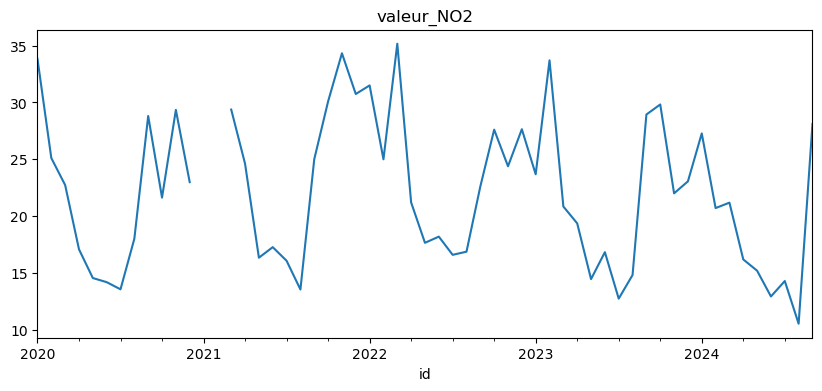

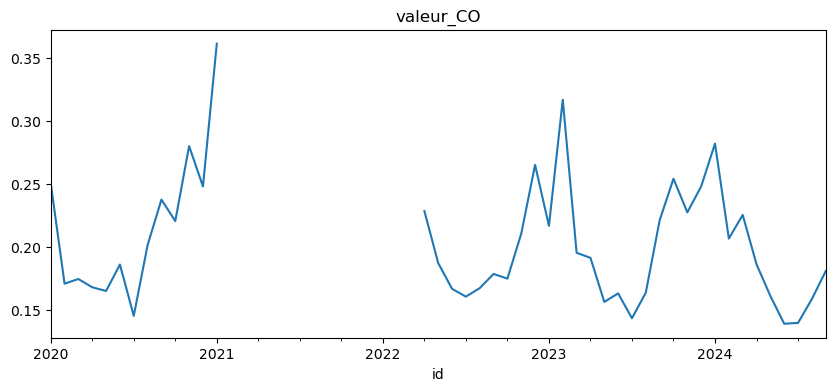

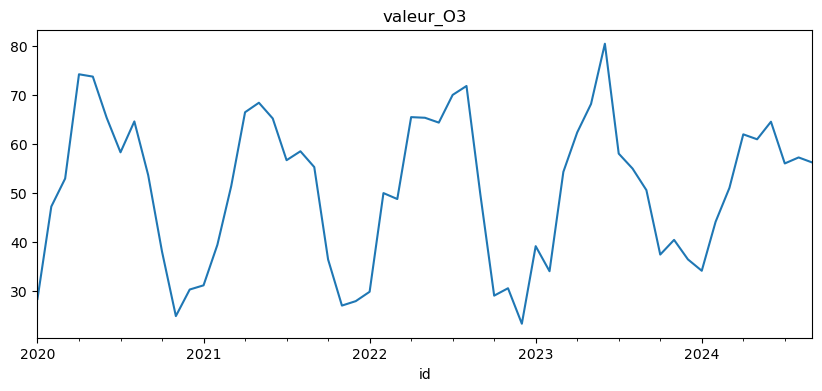

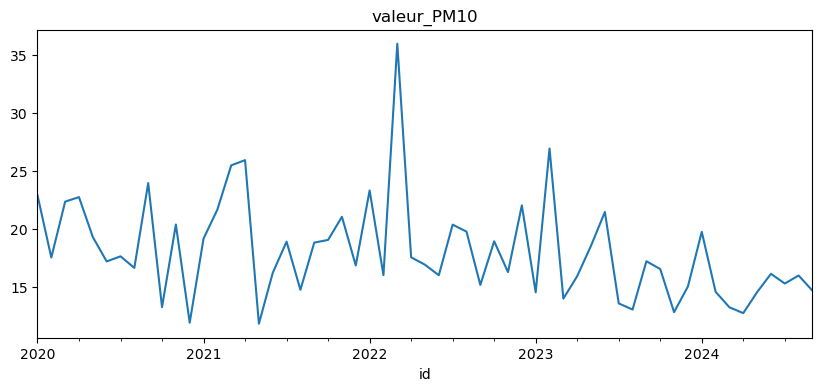

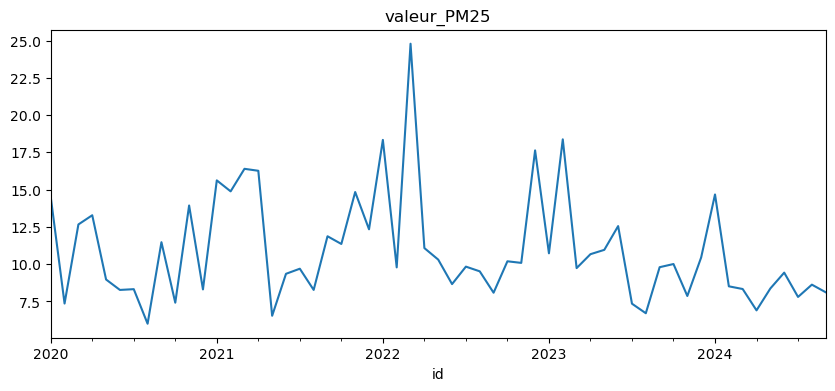

In [34]:
weekly_avg = df.resample('ME', on='id').mean()
for col in weekly_avg.columns:
    plt.figure(figsize=(10, 4))
    weekly_avg[col].plot(title=col)
    plt.show()

Clear winter = more pollution

Let's look at weekly and daily trends

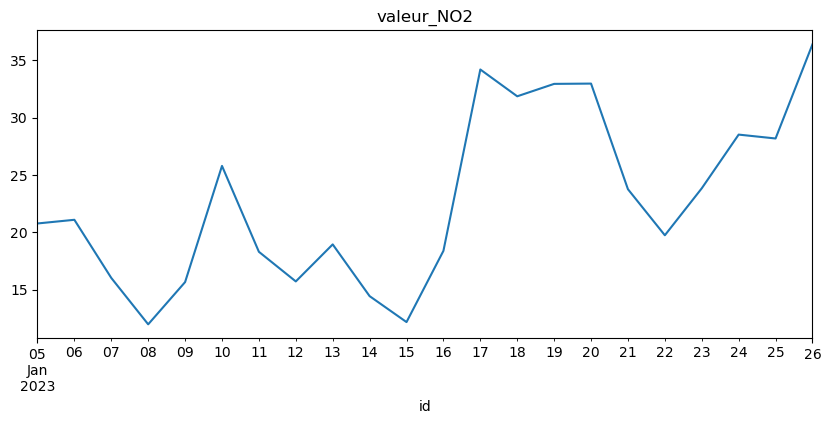

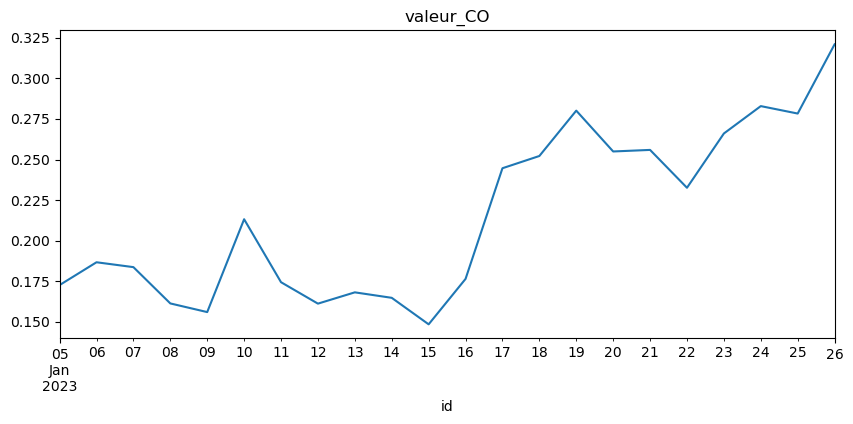

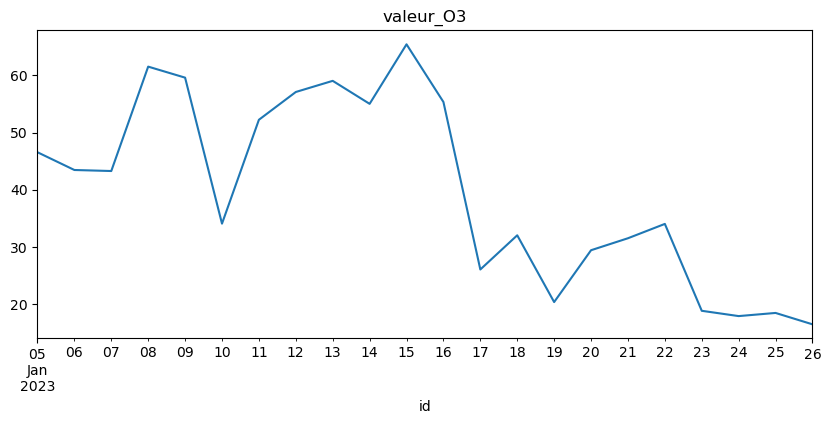

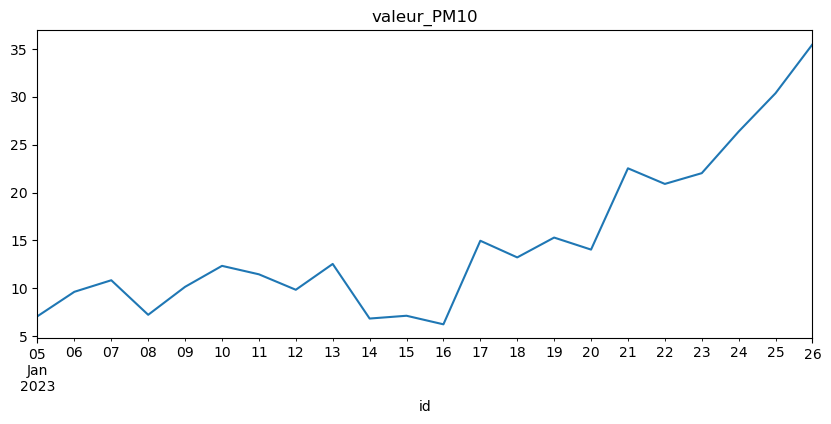

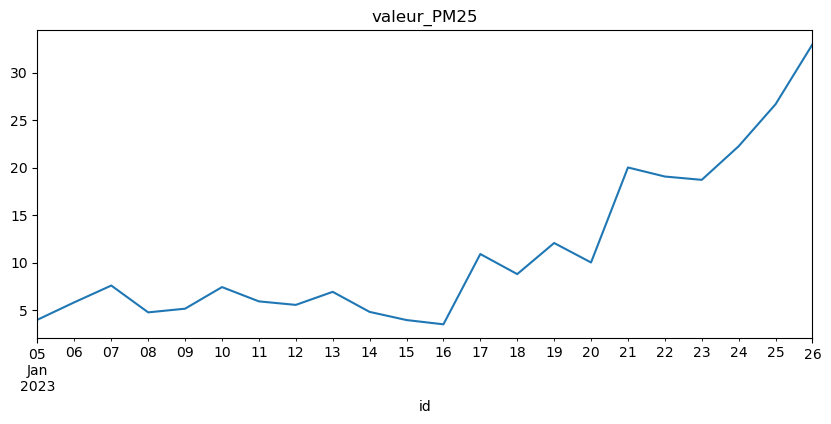

In [35]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-26')
daily_avg = df[filter].resample('D', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

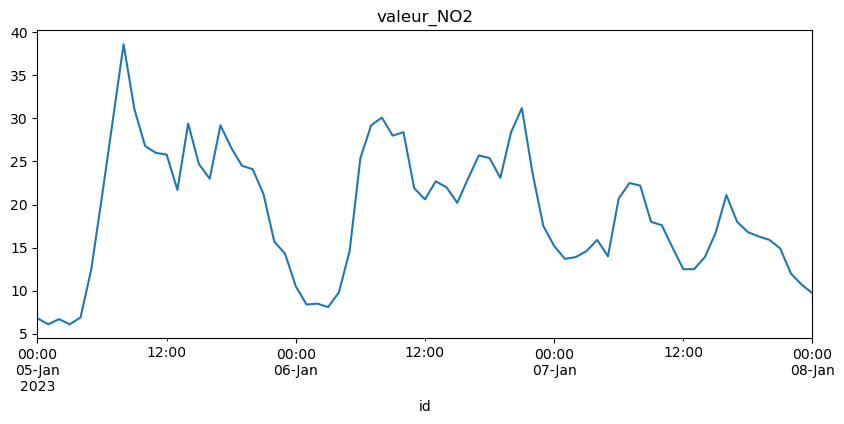

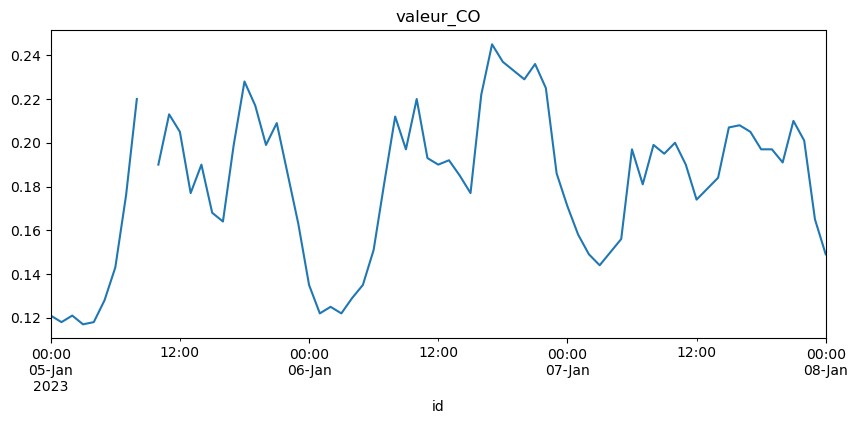

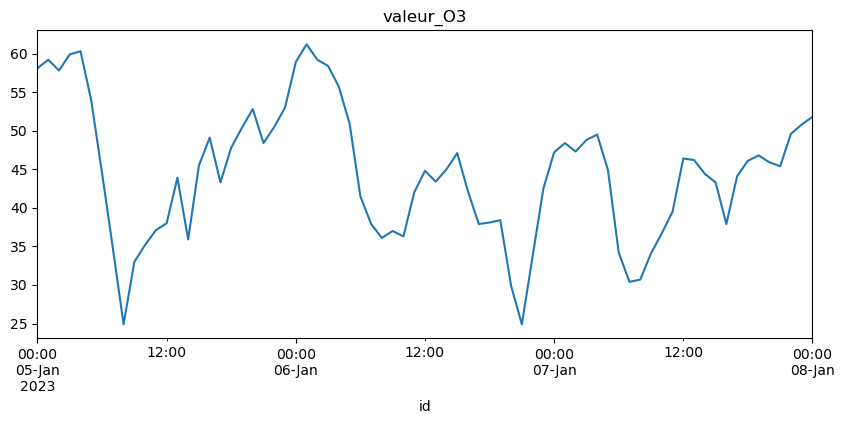

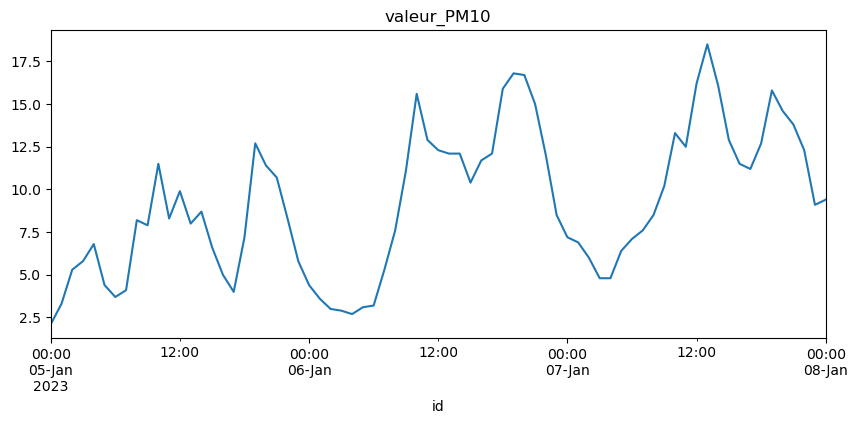

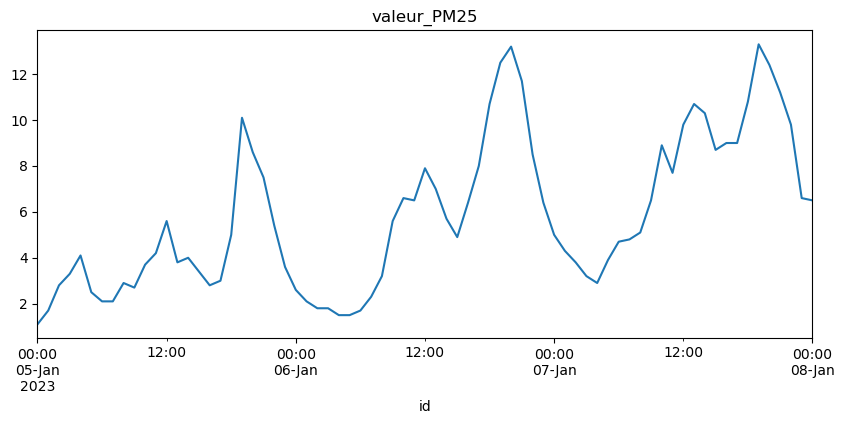

In [36]:
filter = (df['id'] >= '2023-01-05') & (df['id'] <= '2023-01-08')
daily_avg = df[filter].resample('h', on='id').mean()
for col in daily_avg.columns:
    plt.figure(figsize=(10, 4))
    daily_avg[col].plot(title=col)
    plt.show()

Decrease at night and at the middle of the day, probably due to traffic

No clear weekly patterns

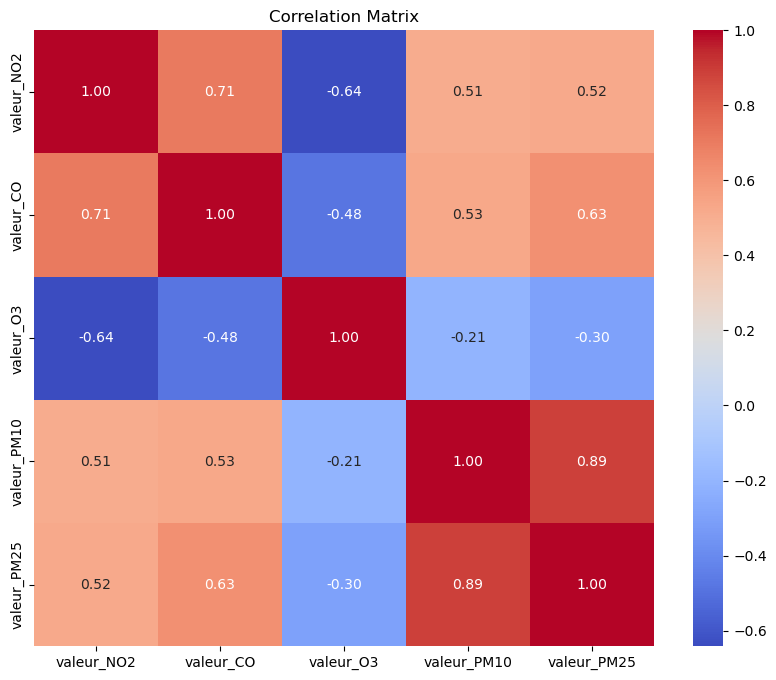

In [37]:
# Calculate the correlation matrix
corr_matrix = df[features].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Weather data

### Do not rerun

In [116]:
df_23 = pd.read_csv('external_data/weather_archives/H_75_23-24.csv', sep=';')
df_20 = pd.read_csv('external_data/weather_archives/H_75_20-22.csv', sep=';')
df_23_clean = df_23[df_23["NOM_USUEL"] == "PARIS-MONTSOURIS"]
df_20_clean = df_20[df_20["NOM_USUEL"] == "PARIS-MONTSOURIS"]
df_weather = pd.concat([df_20_clean, df_23_clean], axis=0, ignore_index=True)

In [117]:
useful_cols = ["AAAAMMJJHH", "RR1", "FF", "T", "U", "PSTAT", "VV", "GLO2"]
col_names = ["date", "precipitation", "wind_speed", "temperature", "humidity", "pressure", "visibility", "global_solar_radiation"]

In [118]:
df_temp = df_weather[useful_cols]
df_temp.columns = col_names
df_temp.to_csv('external_data/weather_clean.csv', index=False)

In [120]:
df_temp

,date,precipitation,wind_speed,temperature,humidity,pressure,visibility,global_solar_radiation
0,2020010100,0.0,1.5,0.8,94.0,1022.5,2139.0,0.0
1,2020010101,0.0,2.6,-0.7,96.0,1022.2,509.0,0.0
2,2020010102,0.0,1.9,-0.3,98.0,1022.2,779.0,0.0
3,2020010103,0.0,1.8,0.0,98.0,1021.9,377.0,0.0
4,2020010104,0.0,2.2,0.3,98.0,1021.6,1317.0,0.0
...,...,...,...,...,...,...,...,...
42311,2024102823,0.0,1.8,11.6,97.0,1017.7,7940.0,NaN
42312,2024102900,0.2,1.7,11.5,96.0,1017.6,10230.0,NaN
42313,2024102901,0.0,1.5,11.5,96.0,1017.6,7960.0,NaN
42314,2024102902,0.0,2.2,11.1,96.0,1017.5,7350.0,NaN


In [127]:
df_temp['date'] = pd.to_datetime(df_temp['date'], format='%Y%m%d%H')
df_temp.to_csv('external_data/weather_clean.csv', index=False)

### Reading

In [128]:
df_weather = pd.read_csv('external_data/weather_clean.csv', parse_dates=['date'])

In [129]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42316 entries, 0 to 42315
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    42316 non-null  datetime64[ns]
 1   precipitation           42291 non-null  float64       
 2   wind_speed              42311 non-null  float64       
 3   temperature             42316 non-null  float64       
 4   humidity                42316 non-null  float64       
 5   pressure                42316 non-null  float64       
 6   visibility              42265 non-null  float64       
 7   global_solar_radiation  42289 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.6 MB


In [130]:
# To merge

df_with_weather = pd.merge(df, df_weather, left_on='id', right_on='date', how='left')
df_with_weather.drop('date', axis=1, inplace=True)
df_with_weather

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,precipitation,wind_speed,temperature,humidity,pressure,visibility,global_solar_radiation
0,2020-01-01 00:00:00,42.9,0.718,15.7,73.1,64.4,0.0,1.5,0.8,94.0,1022.5,2139.0,0.0
1,2020-01-01 01:00:00,33.6,0.587,10.1,74.8,66.0,0.0,2.6,-0.7,96.0,1022.2,509.0,0.0
2,2020-01-01 02:00:00,29.3,NaN,5.1,51.0,44.9,0.0,1.9,-0.3,98.0,1022.2,779.0,0.0
3,2020-01-01 03:00:00,30.5,0.246,7.2,27.7,25.1,0.0,1.8,0.0,98.0,1021.9,377.0,0.0
4,2020-01-01 04:00:00,29.3,0.204,8.3,15.3,13.6,0.0,2.2,0.3,98.0,1021.6,1317.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40986,2024-09-03 18:00:00,NaN,0.222,55.1,12.0,5.3,0.0,1.2,20.5,62.0,1006.7,20000.0,2.0
40987,2024-09-03 19:00:00,NaN,0.245,48.2,13.4,7.0,0.0,1.7,19.6,67.0,1007.2,20000.0,3.0
40988,2024-09-03 20:00:00,NaN,0.234,44.5,12.4,7.1,0.0,2.0,18.4,72.0,1007.6,19890.0,0.0
40989,2024-09-03 21:00:00,NaN,0.225,25.9,10.6,5.4,0.0,1.4,18.2,77.0,1007.7,20000.0,0.0


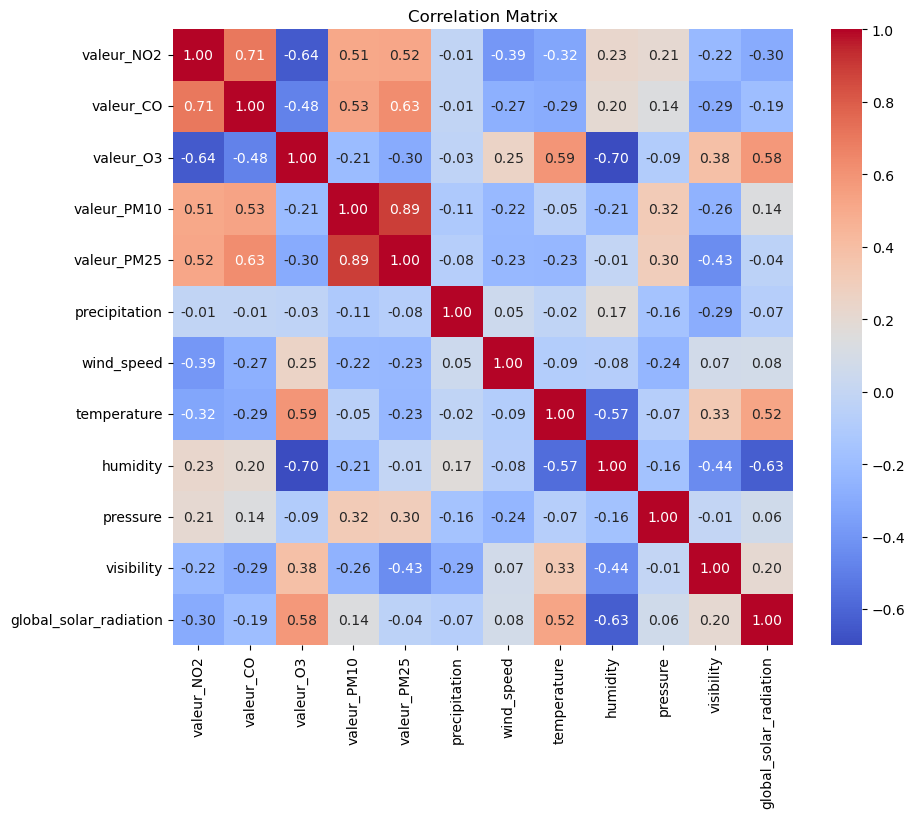

In [131]:
meteo_cols = ["precipitation", "wind_speed", "temperature", "humidity", "pressure", "visibility", "global_solar_radiation"]
corr_matrix = df_with_weather[features + meteo_cols].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Clean weather data

In [43]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_weather = pd.read_csv('external_data/weather_clean.csv', parse_dates=['date'])
df_weather.isna().sum()

precipitation             0
wind_speed                0
temperature               0
humidity                  0
pressure                  0
visibility                0
global_solar_radiation    0
date                      0
dtype: int64

In [35]:
meteo_cols = ["precipitation", "wind_speed", "temperature", "humidity", "pressure", "visibility", "global_solar_radiation"]

# Let's use an iterative imputer to fill the missing values in the weather data
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0, verbose=2, tol=0.01)
df_weather = imputer.fit_transform(df_weather[meteo_cols])

[IterativeImputer] Completing matrix with shape (42316, 7)
[IterativeImputer] Ending imputation round 1/10, elapsed time 115.31
[IterativeImputer] Change: 3931.2659317449416, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 2/10, elapsed time 225.62
[IterativeImputer] Change: 782.5900000000001, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 3/10, elapsed time 359.59
[IterativeImputer] Change: 1435.3799999999992, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 4/10, elapsed time 515.54
[IterativeImputer] Change: 1810.8800000000003, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 5/10, elapsed time 662.09
[IterativeImputer] Change: 834.0799999999981, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 6/10, elapsed time 806.90
[IterativeImputer] Change: 1651.489999999998, scaled tolerance: 200.0 
[IterativeImputer] Ending imputation round 7/10, elapsed time 948.24
[IterativeImputer] Change: 91

c:\Users\User\anaconda3\envs\time_series\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
df_weather_filled_2

precipitation             0
wind_speed                0
temperature               0
humidity                  0
pressure                  0
visibility                0
global_solar_radiation    0
dtype: int64

In [ ]:
df_weather_filled.to_csv('external_data/weather_clean.csv', index=False)

# Clean traffic data

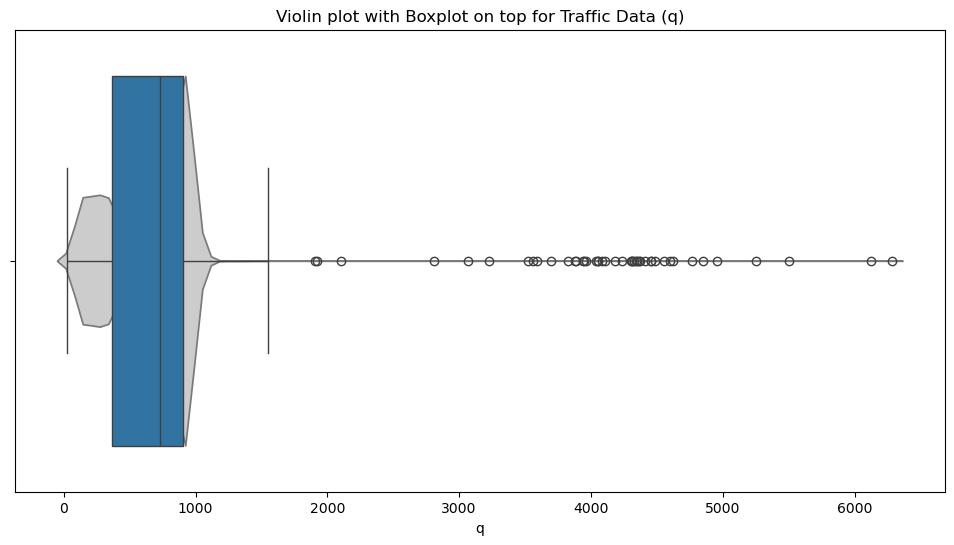

In [26]:
traffic_data = pd.read_csv('external_data/traffic_data.csv', parse_dates=['t_1h'])
plt.figure(figsize=(12, 6))
sns.violinplot(x=traffic_data['q'], inner=None, color=".8")
sns.boxplot(x=traffic_data['q'])
plt.title('Violin plot with Boxplot on top for Traffic Data (q)')
plt.show()

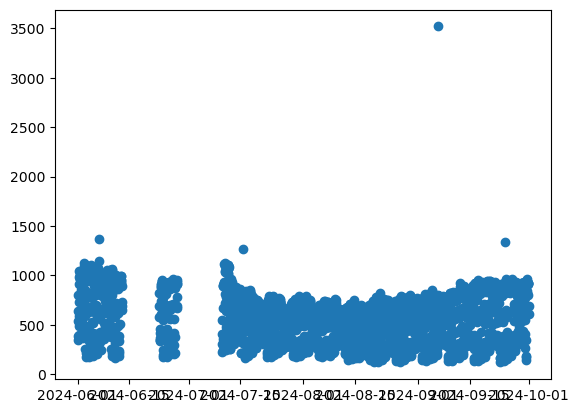

In [23]:
temp = traffic_data[traffic_data['t_1h'] > '2024-06-01']
plt.scatter(temp['t_1h'], temp['q'])

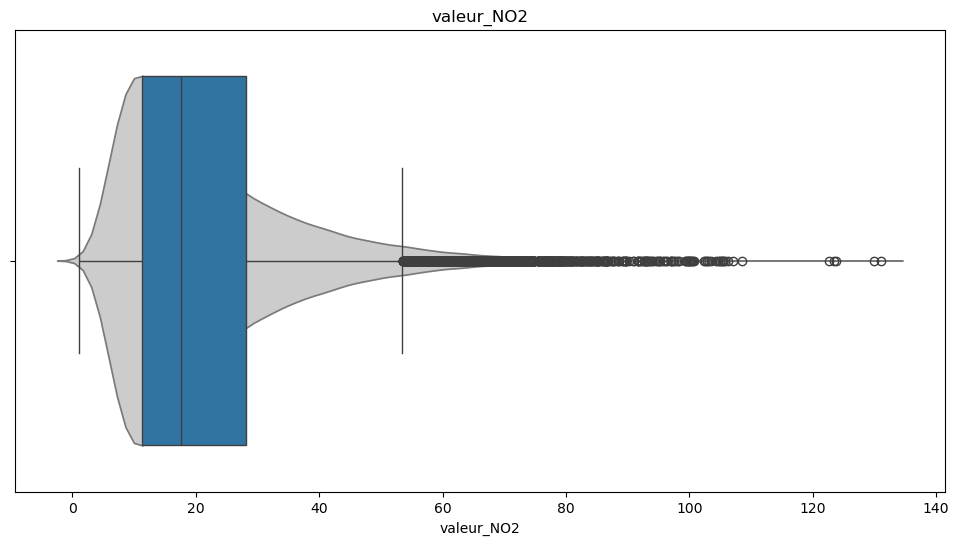

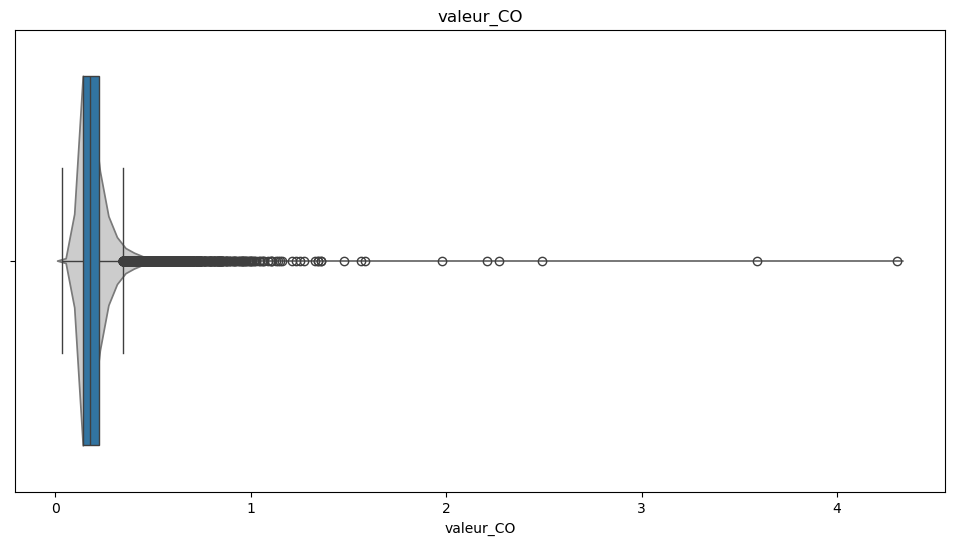

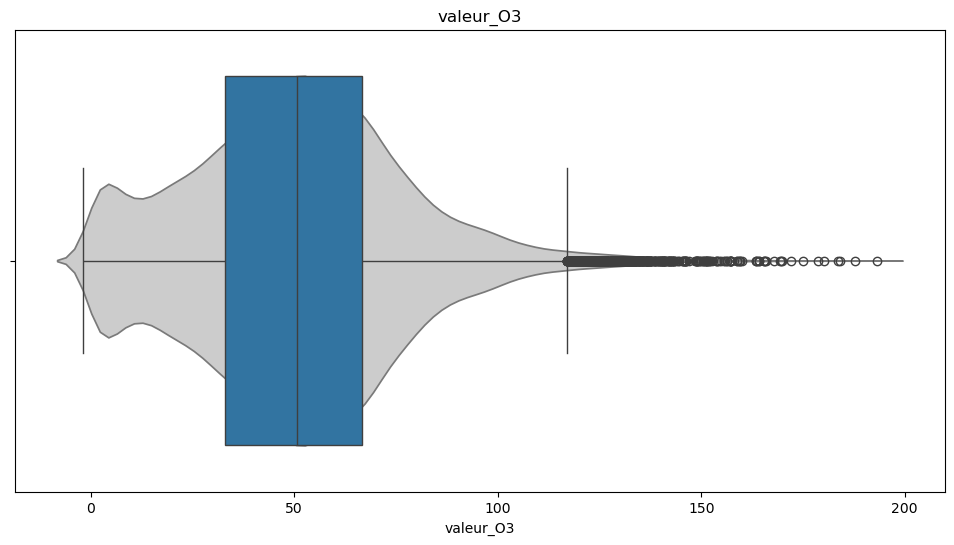

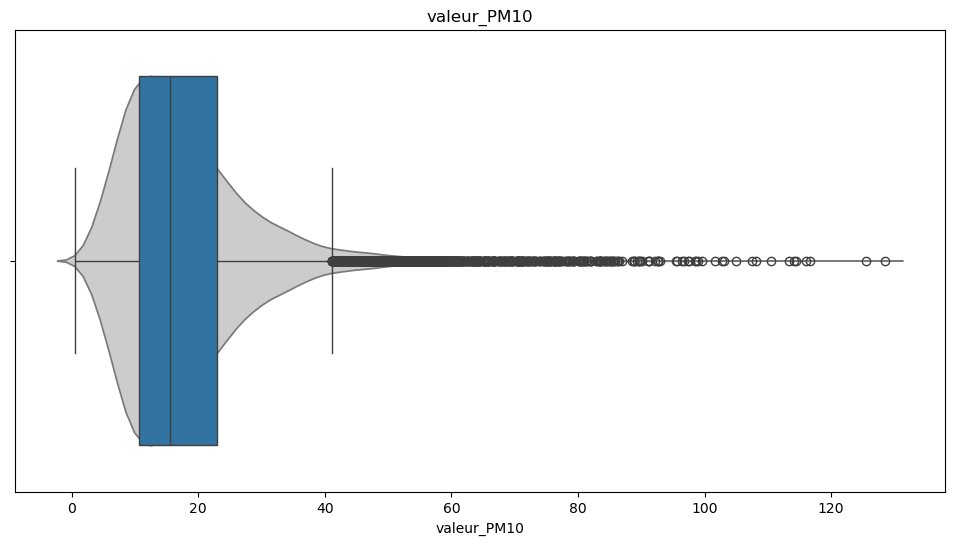

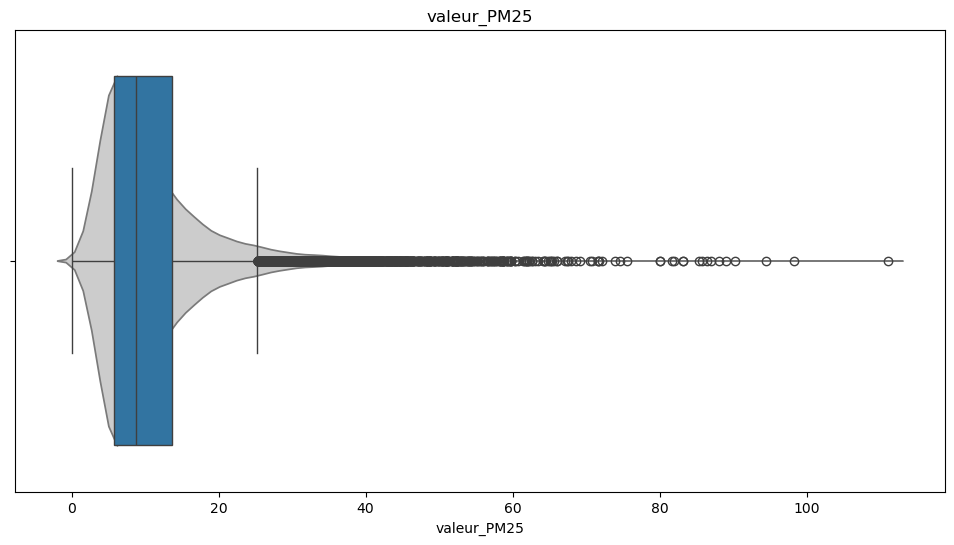

In [39]:
from utils.preprocessing import filter_outliers

data = pd.read_csv('data/train.csv', parse_dates=['id'])
targets = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
for target in targets:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=data[target], inner=None, color=".8")
    sns.boxplot(x=data[target])
    plt.title(target)
    plt.show()

# Replot cov

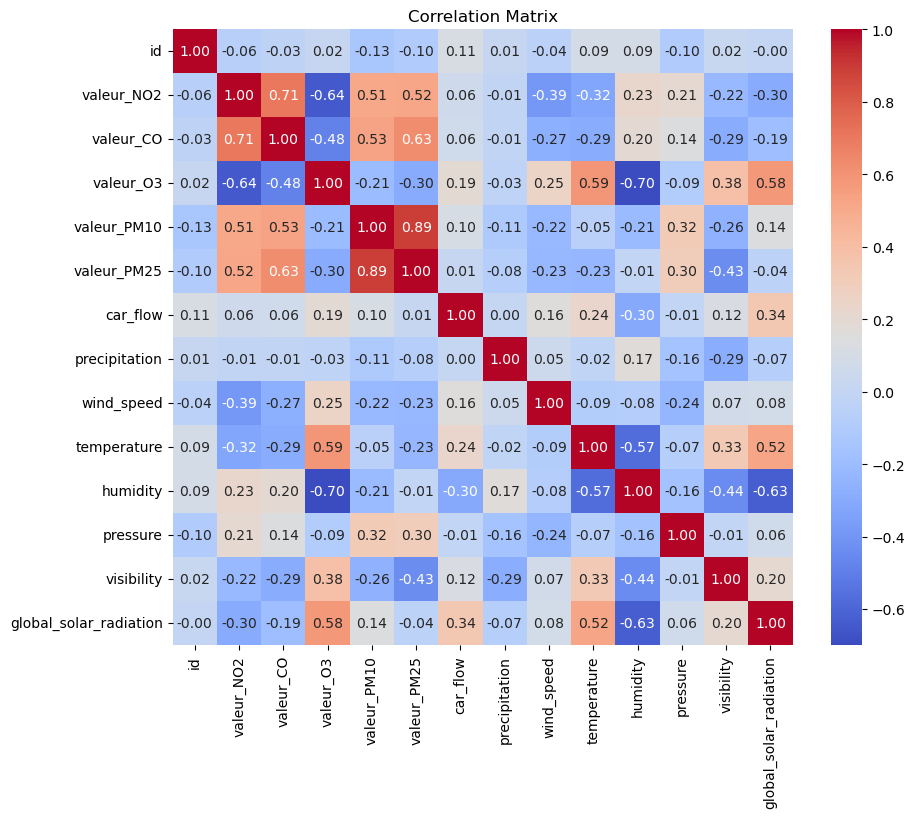

In [40]:
from utils.preprocessing import integrate_traffic, integrate_weather

data = pd.read_csv('data/train.csv', parse_dates=['id'])
data = integrate_traffic(data)
data = integrate_weather(data)

corr_matrix = data.corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

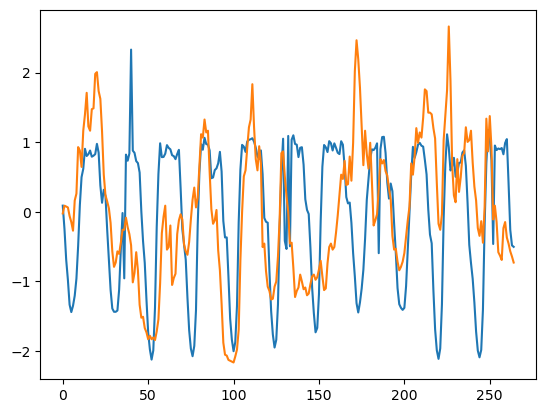

In [80]:
from sklearn.preprocessing import StandardScaler
filter = data["id"].between('2024-01-20', '2024-01-31')
data_temp = data[filter]
data_temp = data_temp.drop(columns=["id"])
scaler = StandardScaler()
temp = scaler.fit_transform(data_temp)
temp = pd.DataFrame(temp, columns=data_temp.columns)
temp.loc[:, "date"] = data[filter]["id"].astype(str)
plt.plot(temp["car_flow"], label="traffic")
plt.plot(temp["valeur_PM10"], label="PM10")

# compare old and new imputation

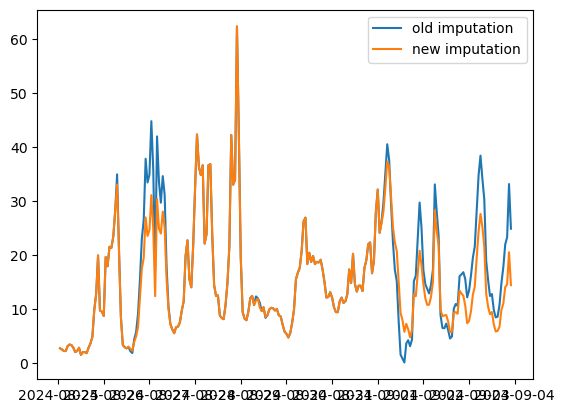

In [75]:
old_imput = pd.read_csv('data/imputed_train.csv', parse_dates=['id'])
new_imput = pd.read_csv('data/imputed_train_v2.csv', parse_dates=['id'])

filter = old_imput["id"] > "2024-08-25"
plt.plot(old_imput[filter]["id"], old_imput[filter]["valeur_NO2"], label="old imputation")
plt.plot(new_imput[filter]["id"], new_imput[filter]["valeur_NO2"], label="new imputation")
plt.legend()

# test

In [90]:
import pandas as pd
pd.read_csv('data/train_preprocessed.csv', parse_dates=['id'])["id"].value_counts()

id
2024-01-01 00:00:00    2
2020-01-01 00:00:00    1
2023-02-12 18:00:00    1
2023-02-12 11:00:00    1
2023-02-12 12:00:00    1
                      ..
2021-07-23 09:00:00    1
2021-07-23 10:00:00    1
2021-07-23 11:00:00    1
2021-07-23 12:00:00    1
2024-09-03 22:00:00    1
Name: count, Length: 40991, dtype: int64